## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [13]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB', 'AAPL']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [14]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.40236925, 0.24399288, 0.35363788])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.20271692127468383

Expected Portfolio Variance:

In [16]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04076870475351506

Expected Portfolio Volatility:

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2019126166278746

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [18]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [19]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.21171324667597347,
  0.17383504220692825,
  0.16907252485108937,
  0.18414621222645336,
  0.139598366339802,
  0.22889415745092698,
  0.21804312678909143,
  0.20957925383239276,
  0.20786622819372183,
  0.21400026103038394,
  0.22746842794061048,
  0.20946626184422276,
  0.21111970086070678,
  0.17684273044472928,
  0.20854599066999202,
  0.24534746920826775,
  0.207674359587725,
  0.17027227857878874,
  0.23008453533518858,
  0.18177233538979995,
  0.19872464997449216,
  0.20208782272507625,
  0.1862484063443946,
  0.1543582075174776,
  0.21388077498230332,
  0.20088365186993695,
  0.1463881662096912,
  0.19880927547708802,
  0.23744689057505092,
  0.22591410570022924,
  0.23402908119139063,
  0.25762134241472995,
  0.21726104253857623,
  0.1810293265711822,
  0.23828947216097485,
  0.15961644013820525,
  0.23409997435897228,
  0.19960089298910524,
  0.2358483409524223,
  0.18729387724190802,
  0.23720438189281343,
  0.2517353260140214,
  0.17167477428065417,
  0.18466949685257844

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [20]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.21171325, 0.17383504, 0.16907252, 0.18414621, 0.13959837,
        0.22889416, 0.21804313, 0.20957925, 0.20786623, 0.21400026,
        0.22746843, 0.20946626, 0.2111197 , 0.17684273, 0.20854599,
        0.24534747, 0.20767436, 0.17027228, 0.23008454, 0.18177234,
        0.19872465, 0.20208782, 0.18624841, 0.15435821, 0.21388077,
        0.20088365, 0.14638817, 0.19880928, 0.23744689, 0.22591411,
        0.23402908, 0.25762134, 0.21726104, 0.18102933, 0.23828947,
        0.15961644, 0.23409997, 0.19960089, 0.23584834, 0.18729388,
        0.23720438, 0.25173533, 0.17167477, 0.1846695 , 0.21603197,
        0.20692908, 0.23804056, 0.20782312, 0.18913824, 0.14950414,
        0.21502668, 0.1718074 , 0.20537307, 0.20672383, 0.2083781 ,
        0.18712724, 0.20850227, 0.17412599, 0.21140941, 0.20927746,
        0.23183826, 0.23725531, 0.21240404, 0.20108867, 0.25780223,
        0.22493626, 0.17063759, 0.23694849, 0.22238131, 0.17588008,
        0.26904822, 0.17101428, 0.18822936, 0.20

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [21]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

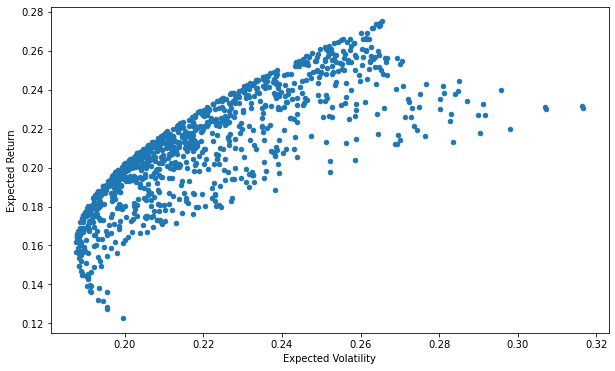

In [22]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')


******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


Expected Portfolio Return:

In [23]:
np.sum(weights * log_returns.mean()) * 250

0.21000461527588582

Expected Portfolio Variance:

In [24]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04717203311584237

Expected Portfolio Volatility:

In [25]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.21719123627771533

*****

Text(0, 0.5, 'Expected Return')

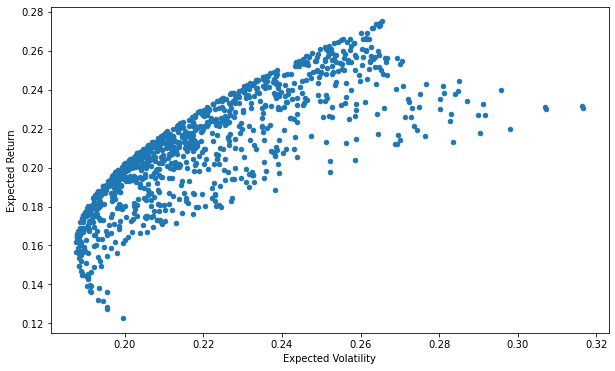

In [26]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')